In [43]:
# ==============================
# 1. Import Libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ==============================
# 2. Load Dataset
# ==============================
df = pd.read_csv("Amazon Sale Report.csv")

# Quick check
print(df.shape)
print(df.columns)
df.head()


(128976, 21)
Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [44]:
# ==============================
# 3. Data Cleaning
# ==============================

# Drop unused columns
df.drop(columns=["index", "New", "PendingS"], inplace=True, errors="ignore")

# Convert date
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Remove cancelled/returned from main sales analysis
sales_df = df[~df["Status"].str.contains("Cancelled|Returned", na=False)]

# Fill missing values if needed
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Qty"] = pd.to_numeric(df["Qty"], errors="coerce").fillna(0)


C:\Users\praka\AppData\Local\Temp\ipykernel_34496\3329914975.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


Total Revenue: 70401249.0
Total Orders: 101213
Cancelled Orders: 17166


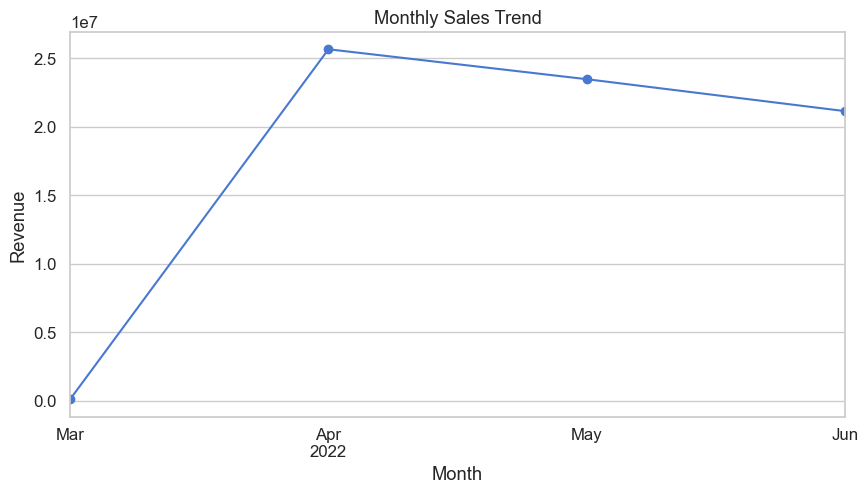

In [45]:
# ==============================
# 4. Sales Overview
# ==============================

# Total revenue and orders
total_revenue = sales_df["Amount"].sum()
total_orders = sales_df["Order ID"].nunique()
cancelled_orders = df[df["Status"].str.contains("Cancelled", na=False)]["Order ID"].nunique()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Cancelled Orders:", cancelled_orders)

# Sales trend over time
sales_trend = sales_df.groupby(sales_df["Date"].dt.to_period("M"))["Amount"].sum()

sales_trend.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()


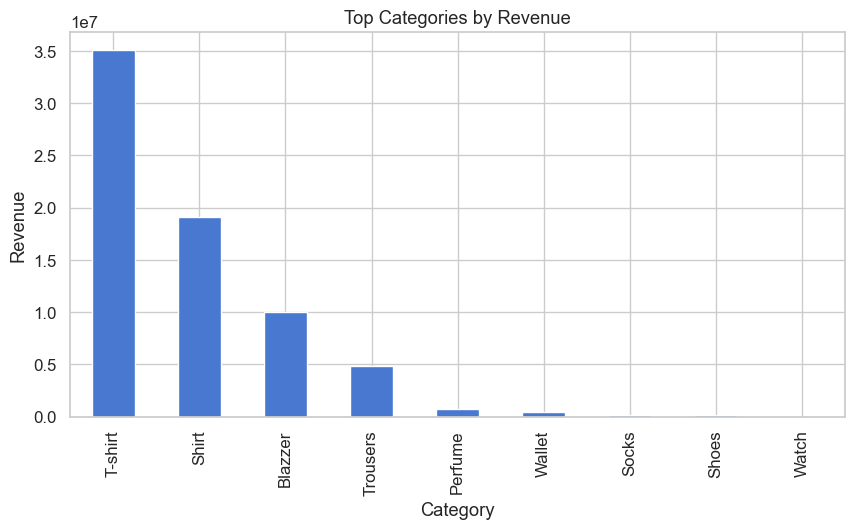

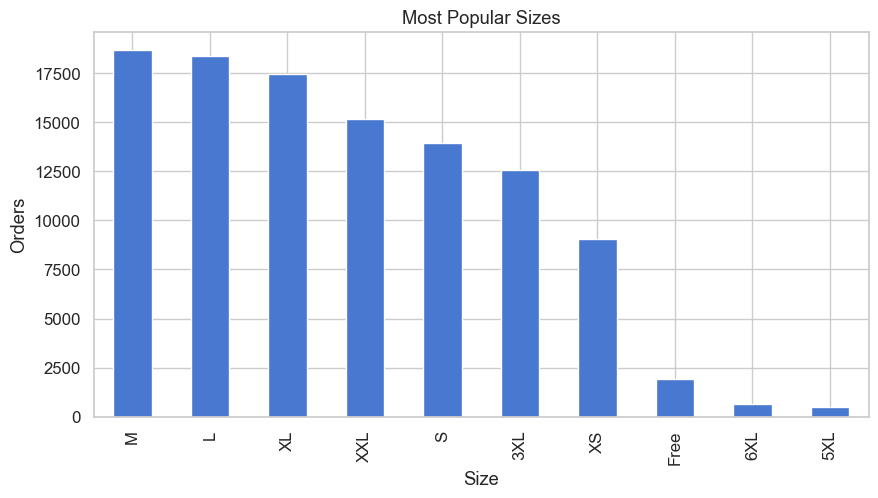

In [46]:
# ==============================
# 5. Product Analysis
# ==============================

# Top categories
top_categories = sales_df.groupby("Category")["Amount"].sum().sort_values(ascending=False).head(10)
top_categories.plot(kind="bar", figsize=(10,5))
plt.title("Top Categories by Revenue")
plt.ylabel("Revenue")
plt.show()

# Popular sizes
size_counts = sales_df["Size"].value_counts().head(10)
size_counts.plot(kind="bar", figsize=(10,5))
plt.title("Most Popular Sizes")
plt.ylabel("Orders")
plt.show()


In [47]:
# Group by Category and sum the Quantity
top_categories_qty = (
    sales_df.groupby("Category")["Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top Categories by Revenue:")
print(top_categories_qty)


Top Categories by Revenue:
Category
T-shirt     35101573.0
Shirt       19099470.0
Blazzer      9979885.0
Trousers     4839621.0
Perfume       719257.0
Wallet        411661.0
Socks         134352.0
Shoes         114515.0
Watch            915.0
Name: Amount, dtype: float64


            Total Orders     Revenue
Fulfilment                          
Amazon             73115  50598970.0
Merchant           28098  19802279.0


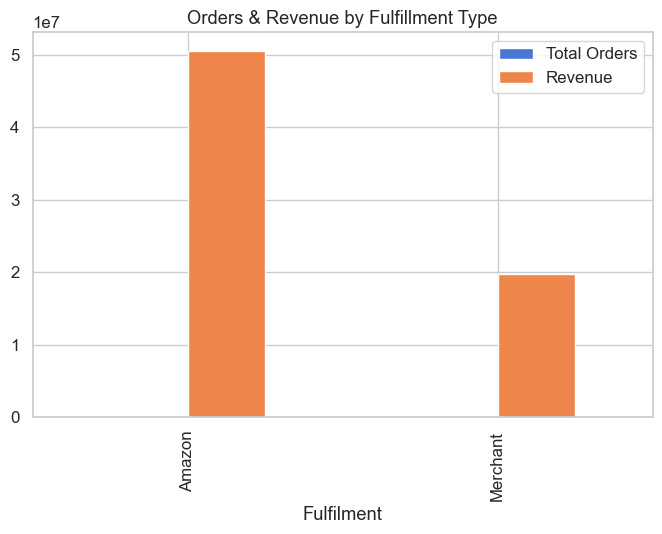

In [48]:
# ==============================
# 6. Fulfillment Analysis
# ==============================

fulfillment_stats = sales_df.groupby("Fulfilment").agg({
    "Order ID": "nunique",
    "Amount": "sum"
}).rename(columns={"Order ID": "Total Orders", "Amount": "Revenue"})

print(fulfillment_stats)

# Simple bar plot for Total Orders and Revenue
fulfillment_stats.plot(kind="bar", figsize=(8,5))
plt.title("Orders & Revenue by Fulfillment Type")
plt.ylabel("")
plt.show()

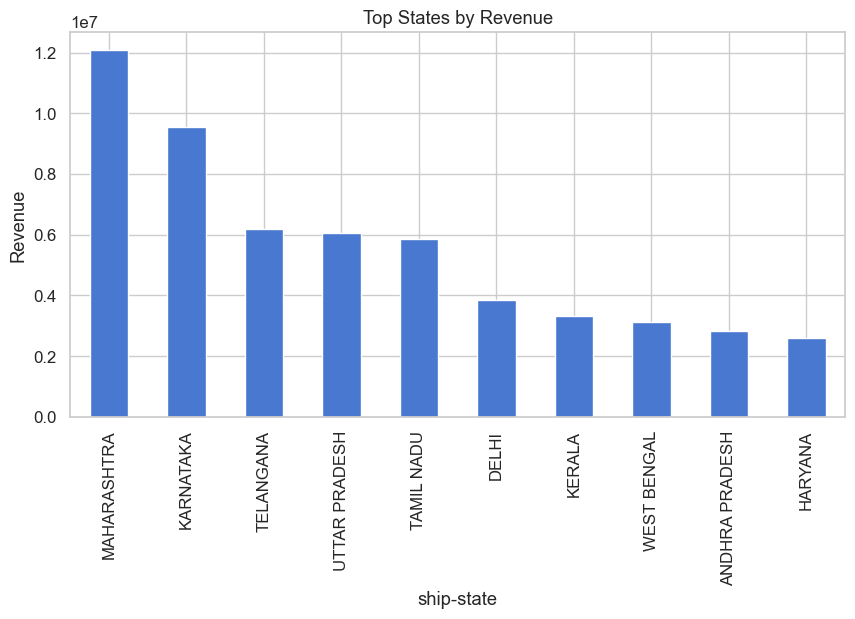

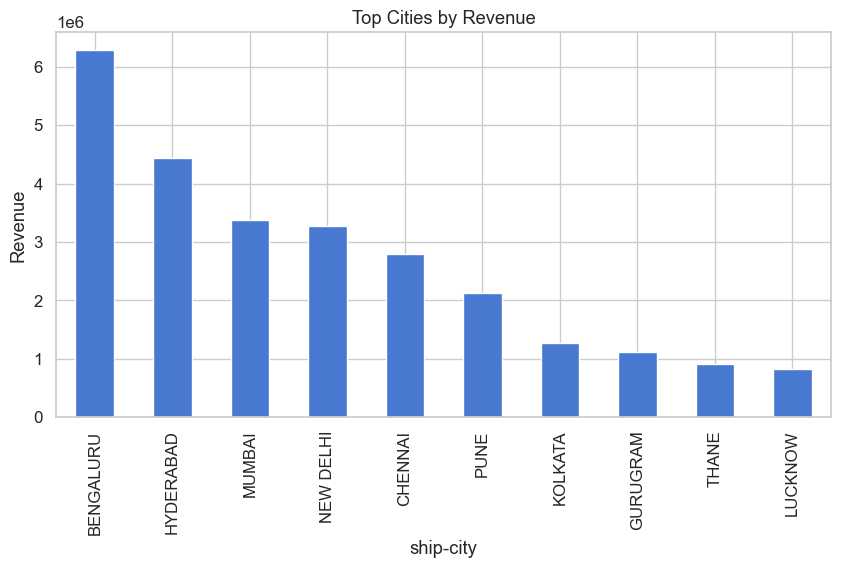

In [49]:
# ==============================
# 7. Geographical Analysis
# ==============================

# Top states
state_sales = sales_df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind="bar", figsize=(10,5))
plt.title("Top States by Revenue")
plt.ylabel("Revenue")
plt.show()

# Top cities
city_sales = sales_df.groupby("ship-city")["Amount"].sum().sort_values(ascending=False).head(10)
city_sales.plot(kind="bar", figsize=(10,5))
plt.title("Top Cities by Revenue")
plt.ylabel("Revenue")
plt.show()


Top 5 States by Revenue:
ship-state
MAHARASHTRA      12075723.0
KARNATAKA         9531907.0
TELANGANA         6188724.0
UTTAR PRADESH     6046926.0
TAMIL NADU        5873597.0
Name: Amount, dtype: float64


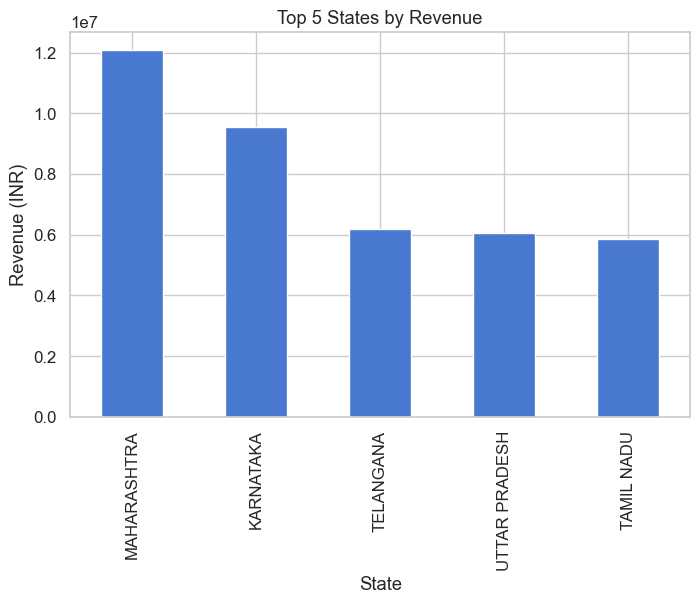

In [50]:
# 🔹 Top 5 States by Revenue
top_states_revenue = (
    sales_df.groupby("ship-state")["Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 States by Revenue:")
print(top_states_revenue)

# 🔹 Plot
top_states_revenue.plot(kind="bar", figsize=(8,5))
plt.title("Top 5 States by Revenue")
plt.ylabel("Revenue (INR)")
plt.xlabel("State")
plt.show()


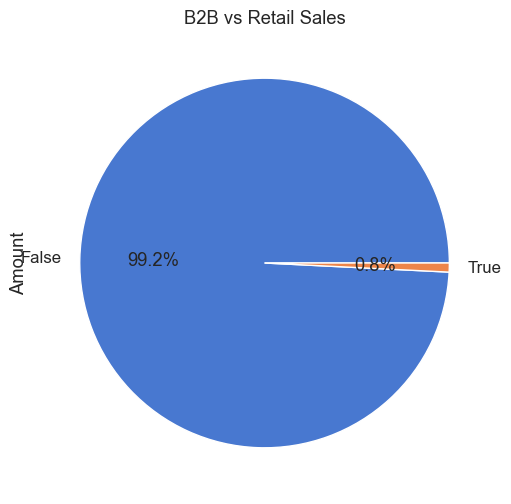

C:\Users\praka\AppData\Local\Temp\ipykernel_34496\3787419579.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df["OrderValueSegment"] = pd.cut(sales_df["Amount"], bins=bins, labels=labels)
C:\Users\praka\AppData\Local\Temp\ipykernel_34496\3787419579.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = sales_df.groupby("OrderValueSegment")["Order ID"].nunique()


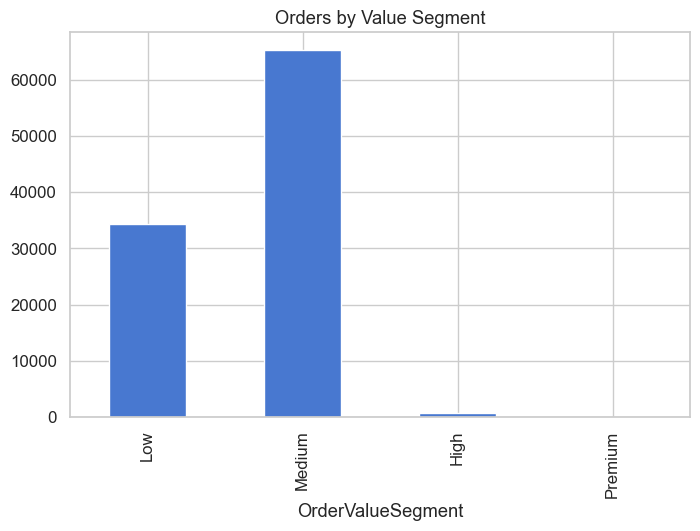

In [51]:
# ==============================
# 8. Customer Segmentation
# ==============================

# B2B vs Retail
b2b_sales = sales_df.groupby("B2B")["Amount"].sum()
b2b_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("B2B vs Retail Sales")
plt.show()

# Order value segmentation
bins = [0, 500, 1500, 5000, 20000]
labels = ["Low", "Medium", "High", "Premium"]
sales_df["OrderValueSegment"] = pd.cut(sales_df["Amount"], bins=bins, labels=labels)

segment_stats = sales_df.groupby("OrderValueSegment")["Order ID"].nunique()
segment_stats.plot(kind="bar", figsize=(8,5))
plt.title("Orders by Value Segment")
plt.show()


B2B vs Retail (by Revenue %):
B2B
False    99.213551
True      0.786449
Name: Amount, dtype: float64


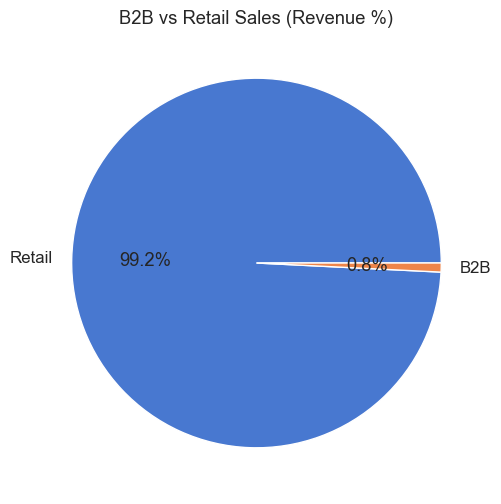

In [52]:
# 🔹 Revenue Share: B2B vs Retail
b2b_revenue = sales_df.groupby("B2B")["Amount"].sum()

# Convert to percentages
b2b_percentage = (b2b_revenue / b2b_revenue.sum()) * 100

print("B2B vs Retail (by Revenue %):")
print(b2b_percentage)

# 🔹 Plot
b2b_percentage.plot(kind="pie", autopct="%1.1f%%", labels=["Retail","B2B"], figsize=(6,6))
plt.title("B2B vs Retail Sales (Revenue %)")
plt.ylabel("")
plt.show()


Order Value Segments (by % of Orders):
OrderValueSegment
Medium (500–1500)    64.755581
Low (<500)           34.608647
High (1500–5000)      0.633889
Premium (>5000)       0.001884
Name: proportion, dtype: float64


C:\Users\praka\AppData\Local\Temp\ipykernel_34496\39191577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df["OrderValueSegment"] = pd.cut(sales_df["Amount"], bins=bins, labels=labels)


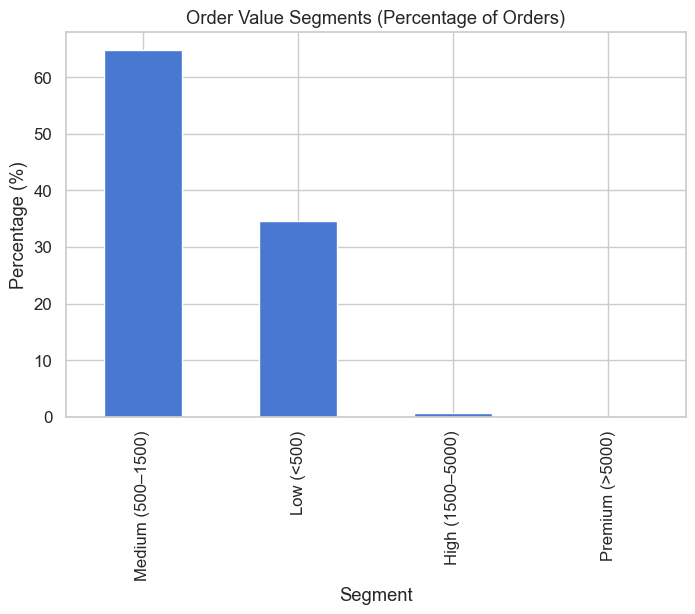

In [53]:
# Define bins for segmentation
bins = [0, 500, 1500, 5000, float("inf")]
labels = ["Low (<500)", "Medium (500–1500)", "High (1500–5000)", "Premium (>5000)"]

# Create a new column for Order Value Segments
sales_df["OrderValueSegment"] = pd.cut(sales_df["Amount"], bins=bins, labels=labels)

# Count orders in each segment
segment_counts = sales_df["OrderValueSegment"].value_counts(normalize=True) * 100

print("Order Value Segments (by % of Orders):")
print(segment_counts)

# 🔹 Plot
segment_counts.plot(kind="bar", figsize=(8,5))
plt.title("Order Value Segments (Percentage of Orders)")
plt.ylabel("Percentage (%)")
plt.xlabel("Segment")
plt.show()


In [54]:
# ==============================
# 9. Insights & Recommendations (Write Manually)
# ==============================
# Example:
# - Shirts & T-shirts are top revenue drivers (60% of sales).
# - Maharashtra & Karnataka lead sales, so focus marketing there.
# - Merchant-fulfilled orders have higher cancellation rate → optimize logistics.
# - Sizes XL & 3XL sell the most → adjust inventory accordingly.
